In [1]:
from torch_rnn import train, RNN, process_data, randomTrainingExample, categoryFromOutput
import torch
import torch.nn as nn
import string
import time
import math

[]


In [2]:
file_path = 'data/data/names/*.txt'

In [3]:
category_lines, all_categories, n_categories = process_data(file_path)

In [4]:
print(n_categories)

18


In [5]:
all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

In [6]:
n_hidden = 128
criterion = nn.NLLLoss()

In [7]:
n_iters = 200000
print_every = 5000
plot_every = 1000

In [8]:
# keep track of losses for plotting

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

In [9]:
def run_loop(init, learning_rate):
    current_loss = 0
    all_losses = []
    rnn = RNN(n_letters, n_hidden, n_categories, init)
    for iter in range(1, n_iters+1):
        category, line, category_tensor, line_tensor = randomTrainingExample(category_lines, all_categories)
        output, loss = train(rnn, criterion, category_tensor, line_tensor, learning_rate)
        current_loss += loss

        # Print ``iter`` number, loss, name and guess
        if iter % print_every == 0:
            guess, guess_i = categoryFromOutput(output, all_categories)
            correct = '✓' if guess == category else '✗ (%s)' % category
            print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

        # Add current loss avg to list of losses
        if iter % plot_every == 0:
            all_losses.append(current_loss / plot_every)
            current_loss = 0
    return all_losses

In [10]:
import itertools

learning_rates =  [5e-4]
inits = ['zeros', 'uniform','glorot']
hyper_grid = list(itertools.product(learning_rates, inits))
print(hyper_grid)

[(0.0005, 'zeros'), (0.0005, 'uniform'), (0.0005, 'glorot')]


In [11]:
losses = {}
for lr, init in hyper_grid:
    losses[(lr,init)] = run_loop(init, lr)

5000 2% (0m 17s) 2.8319 Jagoda / Russian ✗ (Polish)
10000 5% (0m 37s) 2.9315 Olguin / Greek ✗ (Spanish)
15000 7% (0m 54s) 2.9215 Nanson / Greek ✗ (English)
20000 10% (1m 10s) 2.6027 Quan / Vietnamese ✗ (Chinese)
25000 12% (1m 26s) 2.1250 Schroeter / Dutch ✗ (German)
30000 15% (1m 43s) 2.0898 Hofer / German ✓
35000 17% (1m 59s) 3.0982 Araujo / Greek ✗ (Portuguese)
40000 20% (2m 15s) 2.7519 Rafaj / Spanish ✗ (Czech)
45000 22% (2m 40s) 3.4606 Righi / Irish ✗ (Italian)
50000 25% (2m 59s) 2.4863 Raneri / Portuguese ✗ (Italian)
55000 27% (3m 17s) 2.0554 Kesl / Polish ✗ (Czech)
60000 30% (3m 35s) 2.1071 Amador / Italian ✗ (Spanish)
65000 32% (3m 52s) 0.4967 Miyagi / Japanese ✓
70000 35% (4m 10s) 2.7360 Wong / Polish ✗ (Chinese)
75000 37% (4m 28s) 2.6935 Masi / Japanese ✗ (Italian)
80000 40% (4m 47s) 2.0281 Zhao / Japanese ✗ (Chinese)
85000 42% (5m 4s) 1.3318 Pavlicka / Russian ✗ (Czech)
90000 45% (5m 20s) 0.3038 Zheleznyak / Russian ✓
95000 47% (5m 40s) 1.1537 Xing / Chinese ✓
100000 50% (6m 

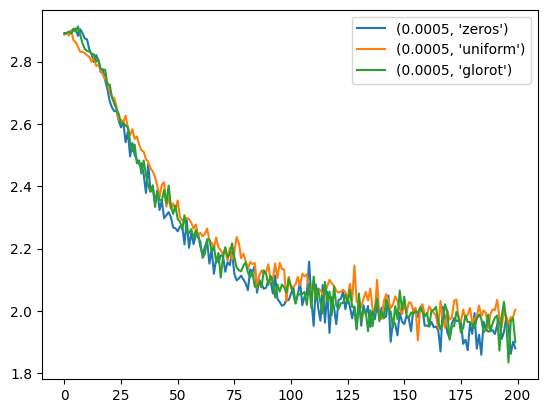

In [12]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
for key, val in losses.items():
    plt.plot(val,label=str(key))
plt.legend()
plt.show()

In [13]:
# todo: experiment with intializations and learning rate